In [3]:
 import numpy as np
    
class SVM:
    
    def __init__(self,lr=0.001,lambda_param= 0.01, iters = 1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.iters = iters
        self.w = None
        self.b = None
        
    
    def fit(self,X,y):
        y_ = np.where(y <=0 ,-1,1)
        n_samples, n_features = X.shape
        
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.iters):
            for index , sample in enumerate(X):
                if y_[index] * (np.dot(sample,self.w)- self.b) >=1:
                    self.w -=  self.lr * (2*self.lambda_param *self.w)
                else:
                    self.w -= self.lr *(2*self.lambda_param * self.w -np.dot(sample, y_[index]))
                    self.b -= self.lr * y_[index]
                
    
    def predict(X):
        linear_output = np.dot(X,self.w) - self.b
        return np.sign(linear_output)
    

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets


X,y = datasets.make_blobs(n_samples = 50, n_features = 2, centers = 2, cluster_std = 1.5, random_state =42)
y = np.where(y==0,-1,1)

clf = SVM()
clf.fit(X,y)

print(clf.w,clf.b)

[ 0.67667263 -0.16483804] -0.6700000000000005


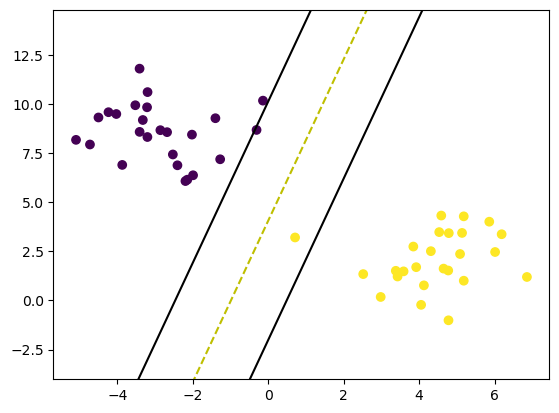

In [7]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

visualize_svm()